<a href="https://colab.research.google.com/github/Shakchi-Prasad/TCS-RIO-125---Drug-Side-effects-Classification/blob/main/Side_effects_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#import necessary libraries

import pandas as pd
import numpy as np

from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [67]:
#load dataset into variable

df =pd.read_csv('drug-dataset.csv').drop(columns=['Unnamed: 0'])
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [68]:
#Identify null values

df.isnull().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [69]:
#handle null values

df.dropna(inplace=True)

In [70]:
#showcases dimensions of data

df.shape

#dataset holds 3106 records, i.e data of 3106 drugs

(3106, 5)

In [71]:
df.describe

<bound method NDFrame.describe of            urlDrugName  rating           effectiveness  \
0            enalapril       4        Highly Effective   
1     ortho-tri-cyclen       1        Highly Effective   
2              ponstel      10        Highly Effective   
3             prilosec       3    Marginally Effective   
4               lyrica       2    Marginally Effective   
...                ...     ...                     ...   
3102           vyvanse      10        Highly Effective   
3103            zoloft       1             Ineffective   
3104           climara       2    Marginally Effective   
3105         trileptal       8  Considerably Effective   
3106          micardis       4    Moderately Effective   

                                   condition                    sideEffects  
0     management of congestive heart failure              Mild Side Effects  
1                           birth prevention            Severe Side Effects  
2                           menstru

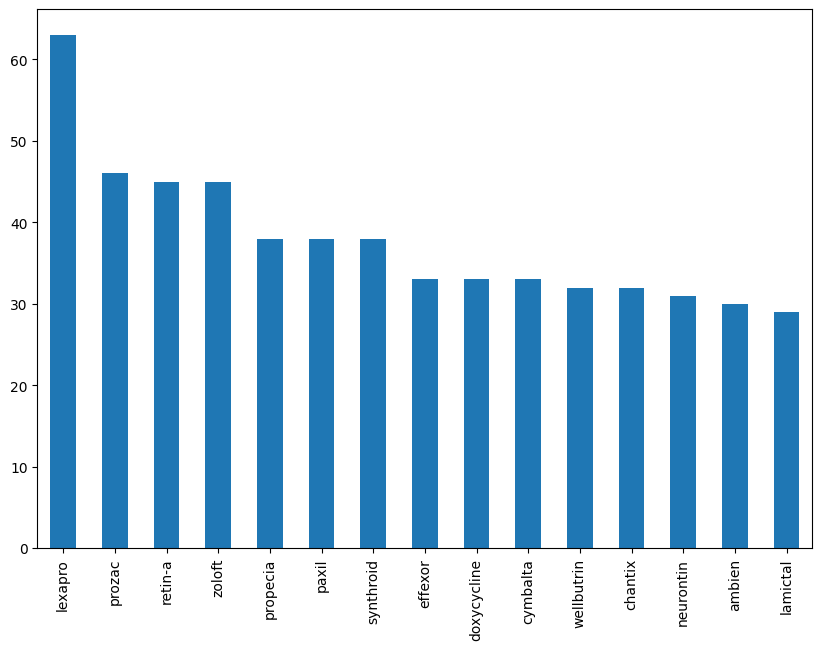

In [72]:
#showcase the top 15 popular drugs

df['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

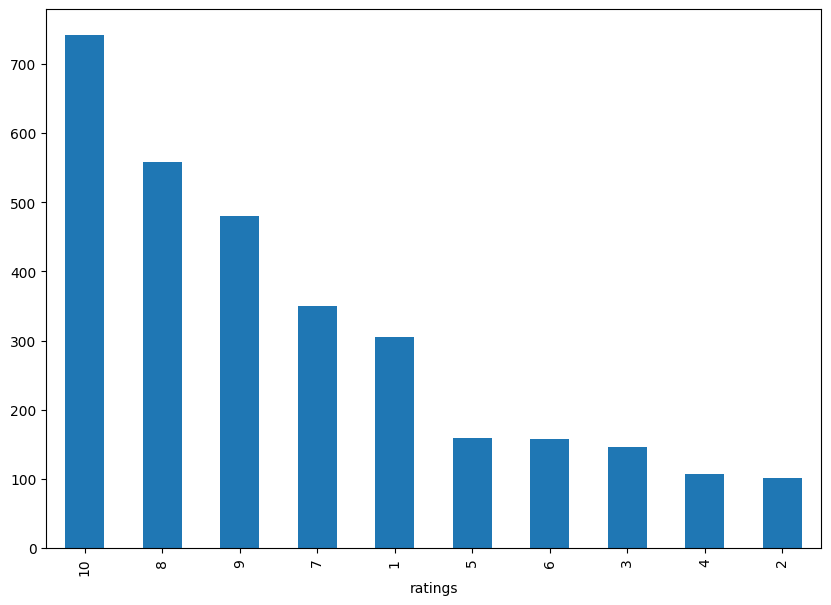

In [73]:
# check the ratings of the drugs

df['rating'].value_counts().head(15).plot(kind='bar')
plt.xlabel('ratings')
plt.show()

#shows the varying ratings of drugs across the dataset

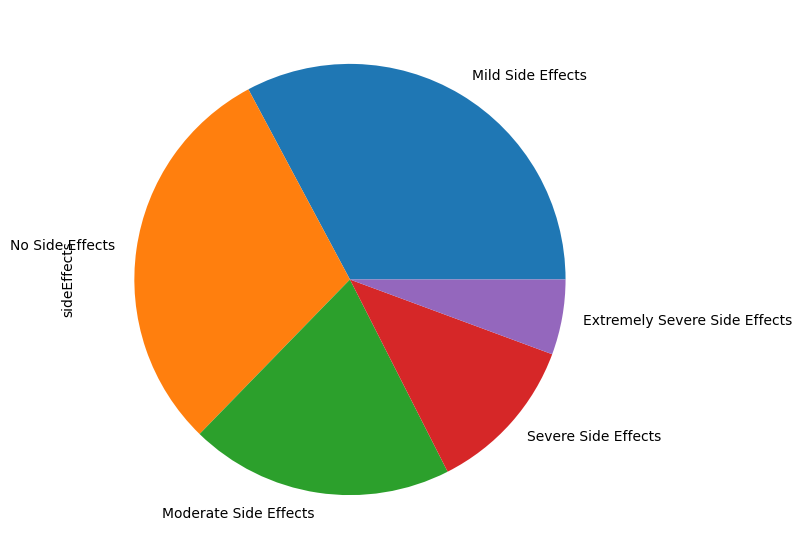

In [74]:
# check the side-effect count of the drugs

df['sideEffects'].value_counts().plot(kind='pie')
plt.show()

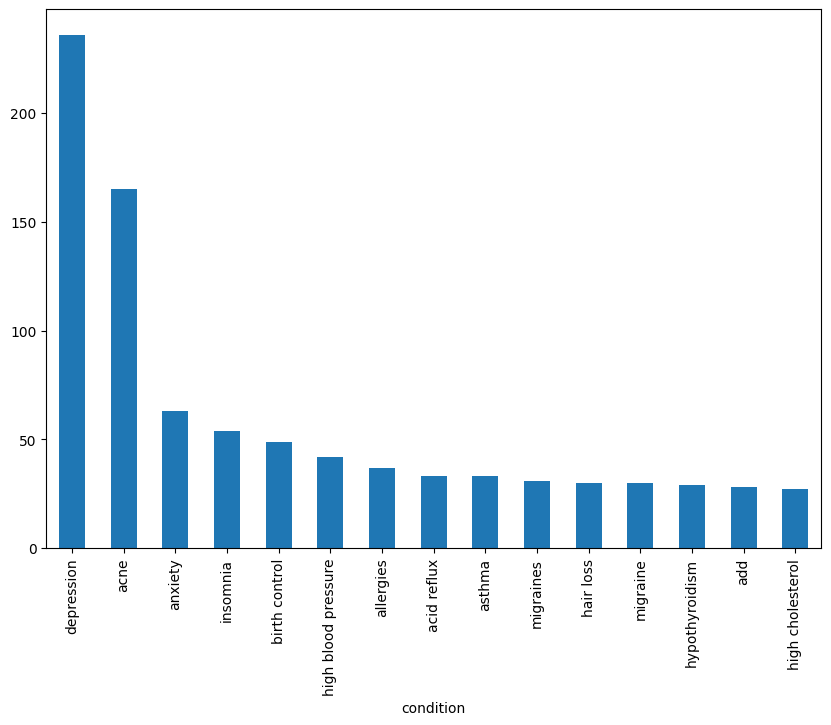

In [75]:
# check the various conditions the medicine cures (top 10) since they are over thousand

df['condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel('condition')
plt.show()

In [76]:
#remove sideeffects from 'df' and store into 'target'

target=df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [77]:
#let convert categorical data to numeric

cols=['urlDrugName','effectiveness','condition']
for x in cols:
    df[x]=pd.factorize(df[x])[0]

target=pd.factorize(target)[0]
#show the new encoded values

df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [78]:
#showing the encoding form of target, i.e. side-effects data

target

array([0, 1, 2, ..., 4, 0, 4])

In [79]:
# scaling the data before modelling to avoid overfitting and other issues

scaler=StandardScaler()
df=scaler.fit_transform(df)
df

array([[-1.21280119, -1.02435755, -1.0466628 , -0.94250417],
       [-1.20431494, -2.04608348, -1.0466628 , -0.94016719],
       [-1.1958287 ,  1.01909431, -1.0466628 , -0.93783021],
       ...,
       [ 0.35715464, -1.70550817, -0.41208645,  2.38769227],
       [ 3.03880891,  0.33794369,  0.85706626, -0.67141449],
       [ 1.16334817, -1.02435755,  1.49164261, -0.74152389]])

# Split data

In [80]:
#70% data split for training and 30% held for training from both df and target

x_train,x_test,y_train,y_test = train_test_split(df,target, test_size=.3)

# using SVM

In [81]:
#using SVM

svm_clf=SVC().fit(x_train,y_train)

svm_pred=svm_clf.predict(x_test)


print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.47      0.50      0.48       311
           1       0.41      0.32      0.36       111
           2       0.51      0.60      0.55       268
           3       0.38      0.56      0.45        48
           4       0.45      0.31      0.37       194

    accuracy                           0.47       932
   macro avg       0.44      0.46      0.44       932
weighted avg       0.47      0.47      0.46       932




# using random forest

In [82]:
#using random forest


rf_clf=RandomForestClassifier().fit(x_train,y_train)

rf_pred=rf_clf.predict(x_test)

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44       311
           1       0.30      0.28      0.29       111
           2       0.50      0.53      0.51       268
           3       0.36      0.42      0.39        48
           4       0.33      0.31      0.32       194

    accuracy                           0.42       932
   macro avg       0.39      0.40      0.39       932
weighted avg       0.42      0.42      0.42       932



# using decision tree

In [83]:
# using decision tree

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
prediction=clf.predict(x_test)

In [84]:
prediction

array([4, 4, 0, 0, 3, 0, 2, 2, 0, 1, 2, 3, 2, 0, 0, 1, 4, 4, 0, 1, 0, 2,
       4, 2, 4, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 3, 2, 2, 2, 4, 4, 4, 0,
       0, 0, 2, 0, 4, 1, 1, 0, 2, 3, 0, 2, 2, 1, 1, 0, 4, 2, 3, 2, 4, 2,
       0, 0, 0, 3, 2, 2, 4, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       4, 2, 4, 0, 0, 4, 1, 0, 2, 0, 1, 4, 0, 4, 4, 4, 2, 0, 0, 0, 4, 2,
       2, 2, 0, 4, 2, 3, 1, 2, 3, 3, 3, 4, 4, 0, 4, 1, 4, 2, 4, 2, 4, 1,
       4, 4, 0, 2, 4, 1, 1, 2, 2, 0, 0, 1, 2, 2, 4, 1, 0, 2, 4, 0, 2, 3,
       2, 2, 0, 0, 0, 0, 0, 3, 1, 1, 2, 4, 0, 0, 4, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 3, 1, 4, 0, 4, 2, 0, 0, 4, 0, 2, 1, 1, 0, 0, 2, 4, 0, 0,
       0, 0, 1, 4, 2, 0, 1, 4, 3, 2, 0, 1, 2, 2, 2, 4, 0, 1, 4, 4, 4, 0,
       4, 4, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 4, 2, 1, 2, 3, 0, 1, 1,
       2, 2, 2, 4, 4, 2, 2, 0, 1, 0, 0, 4, 0, 2, 2, 0, 0, 0, 3, 4, 0, 0,
       4, 0, 0, 0, 3, 2, 2, 2, 4, 0, 2, 0, 2, 4, 2, 2, 0, 1, 0, 2, 4, 1,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 4, 4, 0, 2, 1, 0,

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

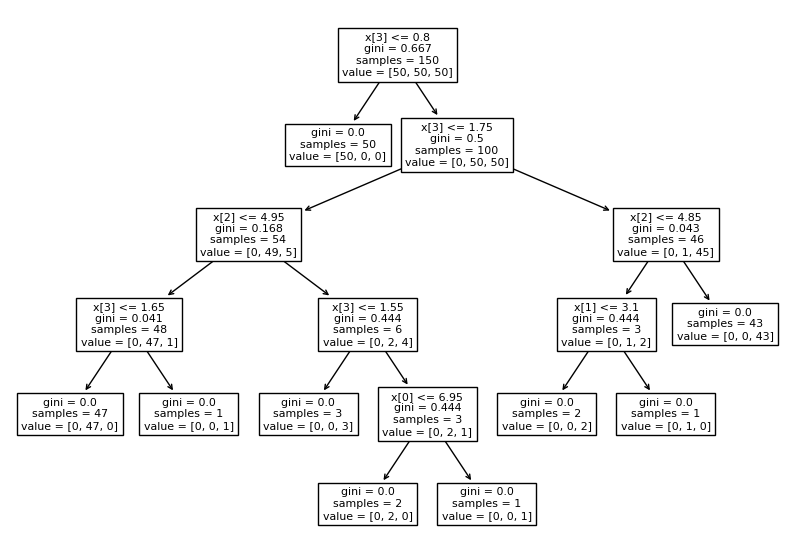

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()
df,target = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df, target)
tree.plot_tree(clf)

# using KNN

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target)

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
y_pred = classifier.predict(X_test)

In [90]:
y_pred

array([0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1])

In [91]:
y_test

array([0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2,
       1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1])

In [92]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.9210526315789473